Activity: Applying Regression Analysis on a Real-World Dataset
Objective:
Students will:

Use Python to implement a linear regression model on a dataset.
Analyze the results of the model, including key metrics like R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
Interpret and visualize the relationship between the input features and the predicted output.
Dataset: Housing Prices Dataset
You will use a Housing Prices Dataset, which contains information about various features of houses (e.g., number of rooms, area, etc.) and their prices. This dataset is ideal for regression analysis because the goal is to predict house prices based on various features.



Alternatively, you can use the preloaded Boston Housing dataset from scikit-learn.

Dataset Overview:
Features (input):
RM: Average number of rooms per dwelling.
LSTAT: Percentage of lower status of the population.
AGE: Proportion of owner-occupied units built before 1940.
DIS: Weighted distances to five Boston employment centers.
TAX: Full-value property tax rate per $10,000.
Target (output):
MEDV: Median value of owner-occupied homes (in $1000s).
Send the screenshot of your codebased and interpretation in pdf format

https://stackoverflow.com/questions/65539013/how-to-plot-a-graph-of-actual-vs-predict-values-in  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html  
https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm


In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
ds = fetch_california_housing()

''' model = LinearRegression(max_iter=200,
                           multi_class="multinomial",
                           solver="lbfgs") '''
# model.fit(ds.items, ds.target)
print(ds)
print(ds.feature_names)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Mean squared error: 0.56
R-squared: 0.58
Root mean squared error: 0.75

      Feature  Importance
3   AveBedrms    0.783145
0      MedInc    0.448675
1    HouseAge    0.009724
4  Population   -0.000002
5    AveOccup   -0.003526
2    AveRooms   -0.123323
6    Latitude   -0.419792
7   Longitude   -0.433708


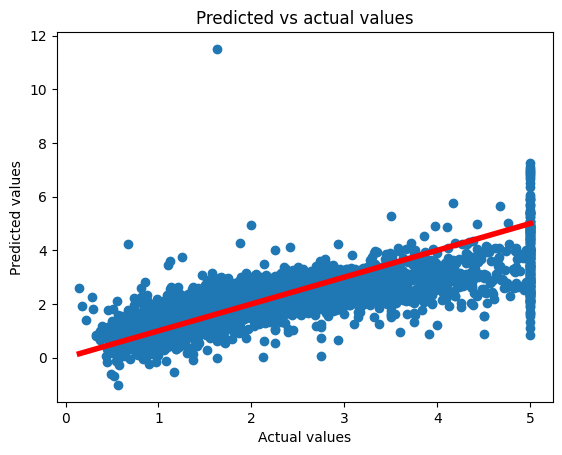

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

ds = fetch_california_housing()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["target"] = ds.target

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1),
                                                    df["target"], test_size=0.2,
                                                    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root mean squared error: {rmse:.2f}")

print()

# feature importance
importances = model.coef_
feature_importances = pd.DataFrame({'Feature': ds.feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)

# plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs actual values')

# line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)

plt.show()